# Cassava Leaf Disease Classification
## Exploratory Data Analysis
https://www.kaggle.com/competitions/cassava-leaf-disease-classification/overview

# 加载数据
1. train.csv
2. images

In [1]:
CSV_PATH = './input/train.csv'
IMAGES_PATH = './input/train_images'

# 数据总览

In [2]:
import torch
import torchvision
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. 图片数量及大小

dataset has  21397  images
image has a size of  (800, 600)
every images has the same size


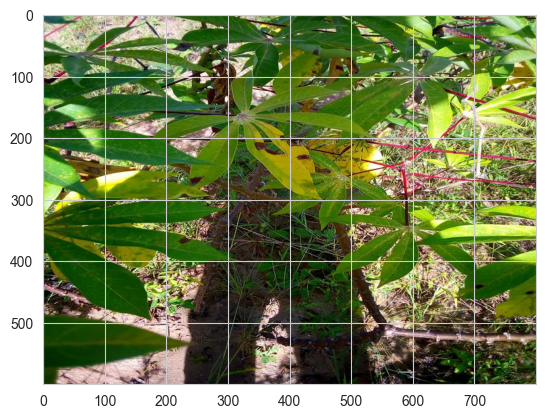

In [3]:
images_list = np.asarray(os.listdir(IMAGES_PATH))
print('dataset has ', len(images_list), ' images')
image = Image.open(os.path.join(IMAGES_PATH, images_list[0]))
plt.imshow(image)
print('image has a size of ', image.size)
flag = 0
for single_image_name in images_list:
    image_1 = Image.open(os.path.join(IMAGES_PATH, single_image_name))
    if image_1.size != image.size:
        print('not every images has the same size')
        flag = 1
        break
if flag == 0:
    print('every images has the same size')

## 2. 训练集label数量以及不同label的数量分布

dataset has 5 kinds of labels
label
3    13158
4     2577
2     2386
1     2189
0     1087
Name: count, dtype: int64


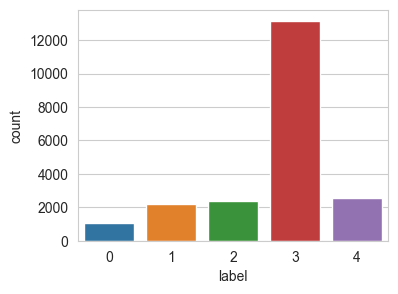

In [4]:
train_csv = pd.read_csv(CSV_PATH)
label_set = train_csv['label'].unique()
label_df = train_csv['label']
print(f'dataset has {len(label_set)} kinds of labels')
label_count = label_df.value_counts()
# label_count = pd.DataFrame(label_count)
print(label_count)
plt.figure(figsize=(4, 3))
sns.barplot(y=label_count.values, x=label_count.index)
plt.xlabel('label')
plt.ylabel('count')
plt.show()

## 3. 图片的均值和方差

In [6]:
mean = torch.zeros(3)
std = torch.zeros(3)
images = np.asarray([image for image in os.listdir(IMAGES_PATH)])
for single_image_name in images:
    for d in range(3):
        image_for_test = Image.open(os.path.join(IMAGES_PATH, single_image_name))
        trans = torchvision.transforms.ToTensor()
        tensor_for_test = trans(image_for_test)
        tensor_for_test = tensor_for_test.unsqueeze(0)
        mean[d] += tensor_for_test[:, d, :, :].mean()
        std[d] += tensor_for_test[:, d, :, :].std()
mean.div_(len(images))
std.div_(len(images))
mean = mean.numpy()
std = std.numpy()
print('mean:', mean, 'std:', std)

mean: [0.4303208  0.49672464 0.31342033] std: [0.21909049 0.22394305 0.20059222]


# 异常训练集图片检查

## 1. 异常形态1检查

C:\Users\33143\AppData\Local\Temp\ipykernel_12200\1204030063.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  label = int(train_csv[train_csv['image_id'] == single_abnormal_image_name]['label'])


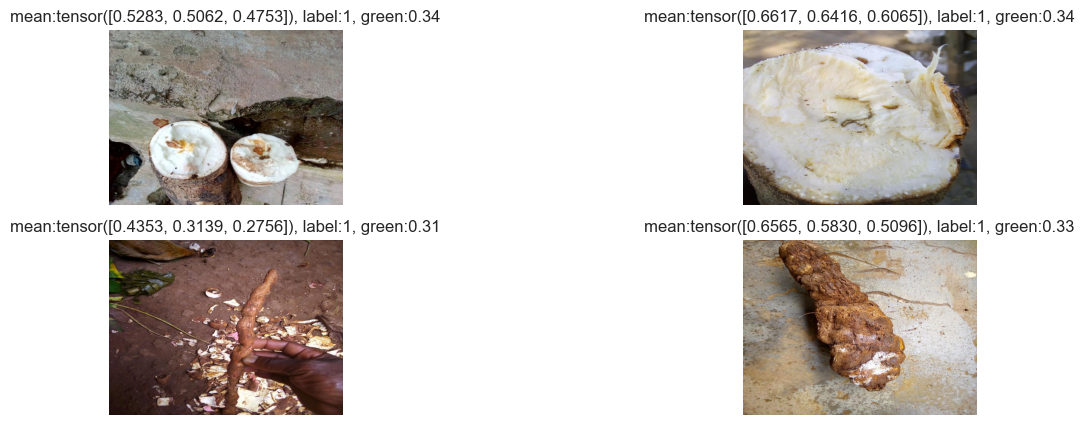

In [7]:
abnormal_list_byhand = ['159654644.jpg', '9224019.jpg', '199112616.jpg', '421035788.jpg']
fig, axes = plt.subplots(2, len(abnormal_list_byhand) // 2, figsize=(15, 5))
for i, single_abnormal_image_name in enumerate(abnormal_list_byhand):
    mean = torch.zeros(3)
    label = int(train_csv[train_csv['image_id'] == single_abnormal_image_name]['label'])
    abnormal_image = Image.open(os.path.join(IMAGES_PATH, single_abnormal_image_name))
    trans = torchvision.transforms.ToTensor()
    abnormal_tensor = trans(abnormal_image)
    abnormal_tensor = abnormal_tensor.unsqueeze(0)
    for d in range(3):
        mean[d] = abnormal_tensor[:, d, :, :].mean()
    axes[i // 2][i % 2].imshow(abnormal_image)
    axes[i // 2][i % 2].set_title(f'mean:{mean}, label:{label}, green:{mean[1]/mean.sum():.2f}')
    axes[i // 2][i % 2].axis('off')
plt.show()

#### 检查结果
1. 整个数据集的G通道占52.69%，而这些图片G通道占比普遍没有达到34%
2. 这些图片label都是1
#### 研究label为1的图片

In [ ]:
LABEL1_PATH = './label1'
for i in range(train_csv.shape[0]):
    if train_csv.iloc[i ,1] == 1:
        image_label_1 = Image.open(os.path.join(IMAGES_PATH, train_csv.iloc[i, 0]))
        image_label_1.save(os.path.join(LABEL1_PATH, train_csv.iloc[i, 0]))

#### label为1属于CBSD，这种疾病对根部有影响，因此会使用根部图片来判断
Cassava Brown Streak Disease（CBSD）是一种影响木薯（cassava）植物的疾病，由两种不同的病毒引起，分别是Cassava Brown Streak Virus (CBSV)和Uganda Cassava Brown Streak Virus (UCBSV)。这两种病毒都属于病毒科中的Potyviridae家族。

CBSD通常对许多非洲国家的木薯产业造成了严重的经济损失，因为木薯是非洲地区的主要粮食作物之一，尤其在一些贫困地区起到重要作用。CBSD的症状包括：

1. 根部褐化和坏疽：这是CBSD最明显的症状之一。植物的根部和块茎会受到感染，表现为褐色斑点、线状坏疽和变形。这会导致木薯块茎变得不适于食用或销售。

2. 叶片症状：CBSD也会在木薯叶片上产生症状，包括黄化、斑点和变形。这会影响植物的光合作用和生长。

3. 减产：由于CBSD感染，木薯植株的产量会显著减少，这对农民和食品供应链造成了重大打击。

CBSD的传播通常是通过感染的种子、植物材料和嫩叶传播的。由于CBSD对木薯产量和食品安全造成了威胁，许多非洲国家采取了措施来控制和管理这一疾病，包括培育抗病品种、提高农民的认识和采取检疫措施以限制病毒的传播。研究和管理CBSD对确保非洲地区的食品安全和农民生计至关重要。

#### 筛选出G通道占比低于34%的图片

In [7]:
abnormal_rgb_image_list = []
images = np.asarray([image for image in os.listdir(IMAGES_PATH)])
for single_image_name in images:
    mean  = torch.zeros(3)
    image_for_test2 = Image.open(os.path.join(IMAGES_PATH, single_image_name))
    trans = torchvision.transforms.ToTensor()
    tensor_for_test2 = trans(image_for_test2)
    tensor_for_test2 = tensor_for_test2.unsqueeze(0)
    for d in range(3):
        mean[d] =  tensor_for_test2[:, d, :, :].mean()
    if (mean[1] / mean.sum()) <= 0.34:
        abnormal_rgb_image_list.append(single_image_name)  
ABNORMAL_RGB_PATH = './abnormal_rgb'
for single_image_name in abnormal_rgb_image_list:
    image = Image.open(os.path.join(IMAGES_PATH, single_image_name))
    image.save(os.path.join(ABNORMAL_RGB_PATH, single_image_name))

#### 筛选结果
筛选出的图片还是包含了大量的正常图片，可能需要进行增广后再进行筛选

## 2. 异常形态2检查

C:\Users\33143\AppData\Local\Temp\ipykernel_12200\987890619.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  label = int(train_csv[train_csv['image_id'] == single_abnormal_image_name]['label'])


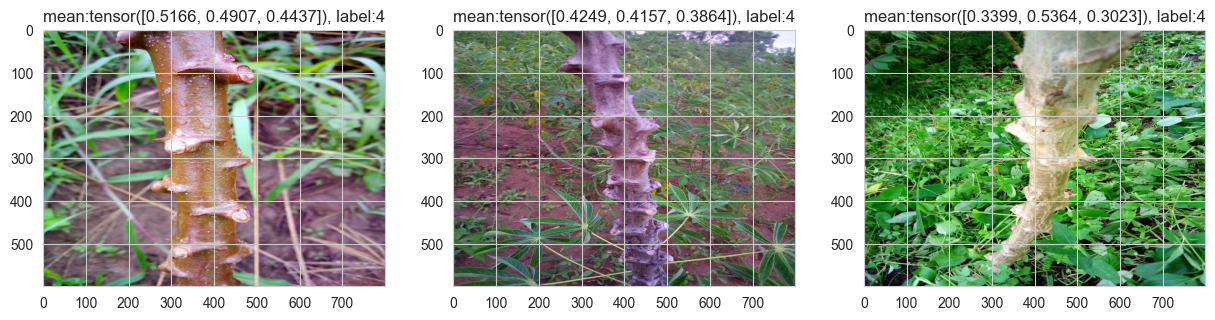

In [8]:
abnormal_list_byhand = ['384390206.jpg', '390601409.jpg', '420749600.jpg']
fig, axes = plt.subplots(1, len(abnormal_list_byhand), figsize=(15, 5))
for i, single_abnormal_image_name in enumerate(abnormal_list_byhand):
    mean = torch.zeros(3)
    label = int(train_csv[train_csv['image_id'] == single_abnormal_image_name]['label'])
    abnormal_image = Image.open(os.path.join(IMAGES_PATH, single_abnormal_image_name))
    trans = torchvision.transforms.ToTensor()
    abnormal_tensor = trans(abnormal_image)
    abnormal_tensor = abnormal_tensor.unsqueeze(0)
    for d in range(3):
        mean[d] = abnormal_tensor[:, d, :, :].mean()
    axes[i].imshow(abnormal_image)
    axes[i].set_title(f'mean:{mean}, label:{label}')
plt.show()

#### 检查结果
这种茎部的拍摄label为4，是健康的，但由于背景的绿色不少，难以使用rgb通道的均值区分
#### 还是应当先把不同类别的分别筛选出来进行检查

In [5]:
LABEL_PATH = [f'./label{i}' for i in range(5)]
for label in range(5):
    for i in range(train_csv.shape[0]):
        if train_csv.iloc[i ,1] == label:
            image_label_1 = Image.open(os.path.join(IMAGES_PATH, train_csv.iloc[i, 0]))
            image_label_1.save(os.path.join(LABEL_PATH[label], train_csv.iloc[i, 0]))